In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

In [2]:
df = pd.read_excel('Risk_Factors.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
df = df.set_index('Date')

In [4]:
df

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46
201309,0.00,3.76,2.85,-1.59
201310,0.00,4.17,-1.56,1.31


In [5]:
df_ri = pd.read_excel ('Industry_Portfolios.xlsx')
df_ri = df_ri.set_index('Date')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
df_rm = pd.read_excel ('Market_Portfolio.xlsx')
df_rm = df_rm.set_index('Date')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [7]:
df_all = pd.concat([df, df_ri, df_rm], axis = 1)

In [8]:
df_all

,Rf,Rm-Rf,SMB,HML,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,,,,,
200401,0.07,2.15,2.67,1.55,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
200402,0.06,1.40,-1.17,0.45,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
200403,0.09,-1.32,1.84,0.07,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
200404,0.08,-1.83,-2.59,-1.67,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
200405,0.06,1.17,-0.10,-0.33,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,0.00,-2.69,0.29,-2.46,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
201309,0.00,3.76,2.85,-1.59,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
201310,0.00,4.17,-1.56,1.31,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17


In [132]:
df_all.loc[:,'NoDur':].to_csv('for_tracking_error.csv')

In [9]:
industry_list = list(df_ri.columns)

In [10]:
industry_list

['NoDur',
 'Durbl',
 'Manuf',
 'Enrgy',
 'HiTec',
 'Telcm',
 'Shops',
 'Hlth',
 'Utils',
 'Other']

In [11]:
df_rm

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


# PART 1 - Minimum Tracking Error Frontier

In [13]:
for i in industry_list:
    df_ri[i+'-rm'] = df_ri[i]-df_rm['Market']

In [14]:
df_ri

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,NoDur-rm,Durbl-rm,Manuf-rm,Enrgy-rm,HiTec-rm,Telcm-rm,Shops-rm,Hlth-rm,Utils-rm,Other-rm
Date,,,,,,,,,,,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [15]:
df_rirm = df_ri.iloc[ : , -10 : ]

In [16]:
df_rirm

,NoDur-rm,Durbl-rm,Manuf-rm,Enrgy-rm,HiTec-rm,Telcm-rm,Shops-rm,Hlth-rm,Utils-rm,Other-rm
Date,,,,,,,,,,
200401,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
200402,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
200403,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
200404,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
200405,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
201308,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
201309,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
201310,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [17]:
exp_deviation = df_rirm.mean().to_numpy()

In [18]:
exp_deviation

array([ 0.15475   , -0.01475   ,  0.26475   ,  0.48308333,  0.01816667,
        0.13333333,  0.16825   ,  0.03575   ,  0.15908333, -0.259     ])

In [126]:
df5 = pd.DataFrame()
df5['Industry'] = industry_list
df5['expected_deviation'] = exp_deviation
df5['tracking_error'] = tracking_error_list   #The function is below, may get an error here
df5

,Industry,expected_deviation,tracking_error
0,NoDur,0.154750,2.332316
1,Durbl,-0.014750,5.160320
2,Manuf,0.264750,1.717702
3,Enrgy,0.483083,4.390320
4,HiTec,0.018167,2.258040
5,Telcm,0.133333,2.163924
6,Shops,0.168250,2.110125
7,Hlth,0.035750,2.796506
8,Utils,0.159083,3.502496
9,Other,-0.259000,2.122075


In [20]:
df_ri_track = df_ri.loc[:,:'Other']

In [21]:
df_ri_track

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [22]:
import numpy as np
import pandas as pd

tracking_error_list = []
def calculate_tracking_error(portfolio_returns, benchmark_returns):
    """
    Calculate the tracking error between portfolio returns and benchmark returns.
    
    Parameters:
    portfolio_returns (pd.Series or np.array): Series or array of portfolio returns.
    benchmark_returns (pd.Series or np.array): Series or array of benchmark returns.
    
    Returns:
    float: Tracking error (standard deviation of the difference between portfolio and benchmark returns).
    """
    # Ensure the input data have the same length
    if len(portfolio_returns) != len(benchmark_returns):
        raise ValueError("Portfolio returns and benchmark returns must have the same length.")
    
    # Calculate the difference between portfolio and benchmark returns
    excess_returns = portfolio_returns - benchmark_returns
    
    # Calculate the standard deviation of excess returns
    tracking_error = np.std(excess_returns, ddof=1)  # ddof=1 for sample standard deviation
    
    return tracking_error

for industry in industry_list:
    tracking_error_list.append(calculate_tracking_error(df_ri_track[industry], df_rm['Market']))

# Example usage with hypothetical data
# portfolio_returns = pd.Series([...])  # Replace with your portfolio returns data
# benchmark_returns = pd.Series([...])  # Replace with your benchmark returns data

# Calculate tracking error
# result = calculate_tracking_error(portfolio_returns, benchmark_returns)
# print("Tracking Error:", result)


In [23]:
Vij = df_rirm.cov()

In [24]:
Vij

,NoDur-rm,Durbl-rm,Manuf-rm,Enrgy-rm,HiTec-rm,Telcm-rm,Shops-rm,Hlth-rm,Utils-rm,Other-rm
NoDur-rm,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl-rm,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf-rm,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy-rm,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec-rm,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm-rm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops-rm,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth-rm,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils-rm,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other-rm,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [25]:
#find e (nx1 Matrix of ones)
e = np.ones(len(industry_list))
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
#Calculate alpha
alpha = exp_deviation.T @ np.linalg.inv(Vij) @ e
alpha

2.9321278826306267

In [27]:
#Calculate zeta
zeta = exp_deviation.T @ np.linalg.inv(Vij) @ exp_deviation
zeta

0.20474497351130097

In [28]:
#Calculate delta
delta = e.T @ np.linalg.inv(Vij) @ e
delta

58.55025437639908

In [29]:
#Calculate Rmv
Rmv = alpha / delta
Rmv

0.05007882397540075

In [30]:
ri_min_rm = np.arange(0,0.101,0.001)
ri_min_rm

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [31]:
#Variance of return for frontier portfolio
var_p_squared = 1/delta + delta / (zeta*delta - alpha**2) * (ri_min_rm - Rmv)**2
sigma_p = np.sqrt(var_p_squared)
sigma_p

array([0.24573951, 0.24223038, 0.23874201, 0.23527533, 0.23183129,
       0.22841092, 0.22501532, 0.2216456 , 0.21830298, 0.21498872,
       0.21170414, 0.20845065, 0.20522973, 0.20204294, 0.19889192,
       0.19577839, 0.19270418, 0.18967119, 0.18668143, 0.18373702,
       0.18084016, 0.17799319, 0.17519853, 0.17245872, 0.16977642,
       0.16715441, 0.16459555, 0.16210285, 0.15967939, 0.15732839,
       0.15505313, 0.152857  , 0.15074346, 0.14871602, 0.14677826,
       0.14493377, 0.14318616, 0.14153902, 0.13999588, 0.13856024,
       0.13723545, 0.13602477, 0.13493125, 0.13395778, 0.13310698,
       0.13238122, 0.13178257, 0.13131276, 0.13097318, 0.13076484,
       0.13068838, 0.13074402, 0.1309316 , 0.13125054, 0.13169991,
       0.13227836, 0.13298421, 0.13381544, 0.13476975, 0.13584452,
       0.13703694, 0.13834394, 0.13976233, 0.14128875, 0.14291973,
       0.14465174, 0.1464812 , 0.14840449, 0.15041803, 0.15251823,
       0.15470158, 0.15696459, 0.15930387, 0.16171612, 0.16419

In [32]:
df3 = pd.DataFrame({'sigma_p': sigma_p, 'Ri-Rm': ri_min_rm})
df3.head()

,sigma_p,Ri-Rm
0,0.245740,0.000
1,0.242230,0.001
2,0.238742,0.002
3,0.235275,0.003
4,0.231831,0.004


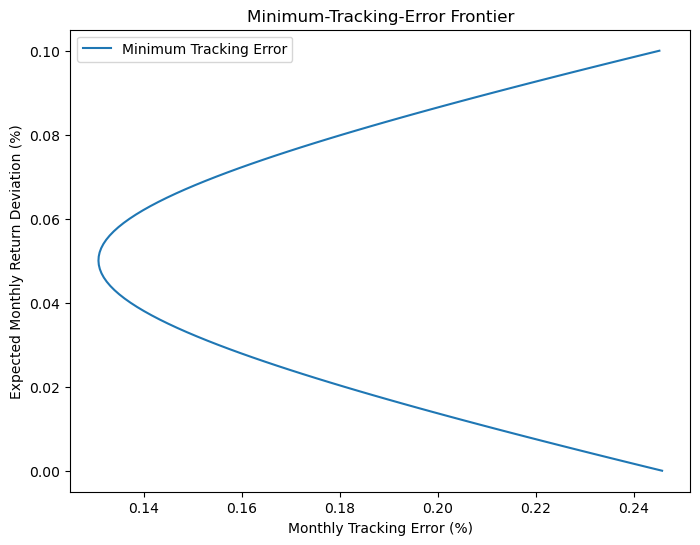

In [33]:
plt.figure(figsize = [8,6])
plt.plot(sigma_p, ri_min_rm,label= 'Minimum Tracking Error')
plt.xlabel('Monthly Tracking Error (%)')
plt.ylabel('Expected Monthly Return Deviation (%)')
plt.title('Minimum-Tracking-Error Frontier')
# plt.xticks(x_new)
plt.legend()

# Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

In [35]:
rf = 0

In [36]:
new_ri_min_rm = np.arange(rf,0.1001,0.001)
new_ri_min_rm

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [37]:
sigma_p_square = (new_ri_min_rm - rf)**2 / (zeta - 2 * alpha * rf + delta * rf * rf)

In [38]:
sigma_p_square

array([0.00000000e+00, 4.88412479e-06, 1.95364991e-05, 4.39571231e-05,
       7.81459966e-05, 1.22103120e-04, 1.75828492e-04, 2.39322115e-04,
       3.12583986e-04, 3.95614108e-04, 4.88412479e-04, 5.90979099e-04,
       7.03313969e-04, 8.25417089e-04, 9.57288458e-04, 1.09892808e-03,
       1.25033595e-03, 1.41151206e-03, 1.58245643e-03, 1.76316905e-03,
       1.95364991e-03, 2.15389903e-03, 2.36391640e-03, 2.58370201e-03,
       2.81325588e-03, 3.05257799e-03, 3.30166836e-03, 3.56052697e-03,
       3.82915383e-03, 4.10754895e-03, 4.39571231e-03, 4.69364392e-03,
       5.00134378e-03, 5.31881189e-03, 5.64604825e-03, 5.98305286e-03,
       6.32982572e-03, 6.68636683e-03, 7.05267619e-03, 7.42875380e-03,
       7.81459966e-03, 8.21021377e-03, 8.61559612e-03, 9.03074673e-03,
       9.45566559e-03, 9.89035269e-03, 1.03348080e-02, 1.07890317e-02,
       1.12530235e-02, 1.17267836e-02, 1.22103120e-02, 1.27036086e-02,
       1.32066734e-02, 1.37195065e-02, 1.42421079e-02, 1.47744775e-02,
      

In [39]:
new_std = np.sqrt(sigma_p_square)

In [40]:
new_std

array([0.        , 0.00221001, 0.00442001, 0.00663002, 0.00884002,
       0.01105003, 0.01326003, 0.01547004, 0.01768004, 0.01989005,
       0.02210006, 0.02431006, 0.02652007, 0.02873007, 0.03094008,
       0.03315008, 0.03536009, 0.0375701 , 0.0397801 , 0.04199011,
       0.04420011, 0.04641012, 0.04862012, 0.05083013, 0.05304013,
       0.05525014, 0.05746015, 0.05967015, 0.06188016, 0.06409016,
       0.06630017, 0.06851017, 0.07072018, 0.07293019, 0.07514019,
       0.0773502 , 0.0795602 , 0.08177021, 0.08398021, 0.08619022,
       0.08840022, 0.09061023, 0.09282024, 0.09503024, 0.09724025,
       0.09945025, 0.10166026, 0.10387026, 0.10608027, 0.10829027,
       0.11050028, 0.11271029, 0.11492029, 0.1171303 , 0.1193403 ,
       0.12155031, 0.12376031, 0.12597032, 0.12818033, 0.13039033,
       0.13260034, 0.13481034, 0.13702035, 0.13923035, 0.14144036,
       0.14365036, 0.14586037, 0.14807038, 0.15028038, 0.15249039,
       0.15470039, 0.1569104 , 0.1591204 , 0.16133041, 0.16354

In [41]:
sigma_mv = np.sqrt(1/delta)

In [42]:
sigma_tg = -(np.sqrt(zeta - 2*alpha*rf + delta * rf**2))/(delta*(rf - Rmv))

In [43]:
Rtg = (alpha * rf - zeta) / (delta * rf - alpha)

In [44]:
Rtg

0.06982811859065617

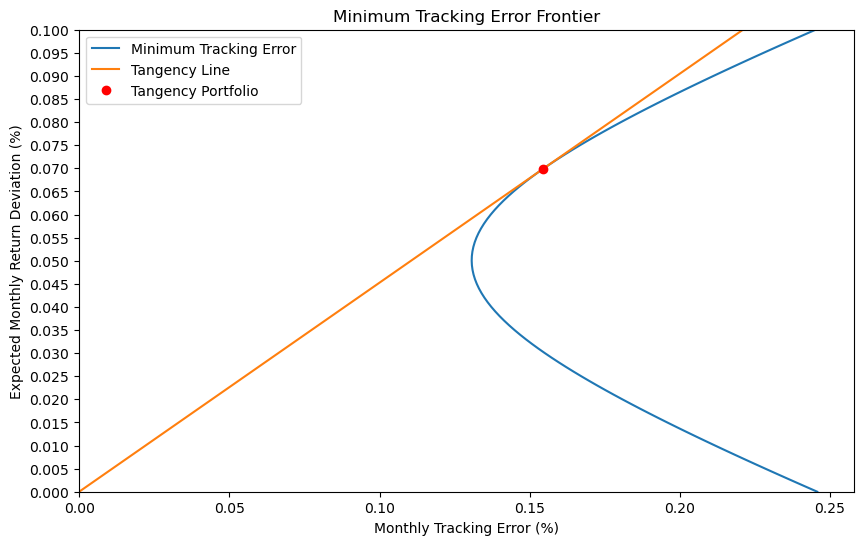

In [45]:
plt.figure(figsize = [10,6])
plt.plot(sigma_p, ri_min_rm,label='Minimum Tracking Error')
plt.plot(new_std, new_ri_min_rm,label='Tangency Line')

# plt.axhline(y = Rmv, color='black', linestyle="--")
plt.plot(sigma_tg, Rtg, "ro", label="Tangency Portfolio")
# plt.plot(sigma_mv, Rmv, "o", color="black")

plt.xlabel('Monthly Tracking Error (%)')
plt.ylabel('Expected Monthly Return Deviation (%)')
plt.title('Minimum Tracking Error Frontier')
plt.yticks(np.arange(0,0.1001,0.005))
plt.ylim(0,0.1)
plt.xlim(0,)
plt.legend()

# Calculate information ratio and portfolio weights for the "tangency" portfolio.

In [47]:
sigma_tg

0.15432053366443685

In [48]:
info_ratio = (Rtg - rf)/ sigma_tg
info_ratio

0.45248753961993365

In [49]:
#DOUBLE CHECK

In [50]:
info_ratio2 = np.sqrt(zeta - 2 * alpha * rf + delta * rf**2)
info_ratio2

0.4524875396199336

In [51]:
a = (zeta * np.dot(np.linalg.inv(Vij), e) - alpha * np.dot(np.linalg.inv(Vij), exp_deviation)) / (zeta * delta - alpha ** 2)
a

array([0.04909583, 0.01528779, 0.01234696, 0.08155792, 0.22130607,
       0.06329234, 0.04862012, 0.1125285 , 0.06661824, 0.32934622])

In [52]:
b = (delta * np.dot(np.linalg.inv(Vij), exp_deviation) - alpha * np.dot(np.linalg.inv(Vij), e)) / (zeta * delta - alpha ** 2)
b

array([ 0.05067251, -0.21673729,  1.79411608,  0.07839701, -0.60080647,
        0.11143973,  0.83439661, -0.13966512, -0.37887357, -1.53293948])

In [53]:
w_star = a + np.dot(b, Rtg)

In [54]:
w_star

array([5.26341943e-02, 1.53428449e-04, 1.37626709e-01, 8.70322403e-02,
       1.79352886e-01, 7.10739711e-02, 1.06884468e-01, 1.02775950e-01,
       4.01622131e-02, 2.22303939e-01])

In [55]:
np.dot(w_star,e)

1.0000000000000002

In [56]:
df2= pd.DataFrame()

In [57]:
df2['Industry'] = industry_list
df2['Portfolio Weight'] = w_star

In [58]:
df2

,Industry,Portfolio Weight
0,NoDur,0.052634
1,Durbl,0.000153
2,Manuf,0.137627
3,Enrgy,0.087032
4,HiTec,0.179353
5,Telcm,0.071074
6,Shops,0.106884
7,Hlth,0.102776
8,Utils,0.040162
9,Other,0.222304


# Part 2: Minimum-Variance Frontier w/o Short Sales

In [60]:
df_ri_2 = df_ri.iloc[:,:10]

In [61]:
R = df_ri_2.mean()

In [62]:
V = df_ri_2.cov()

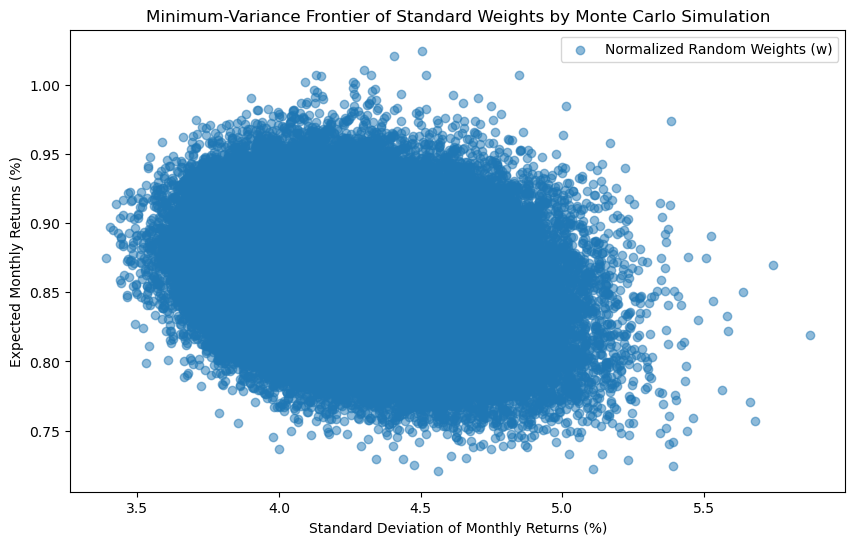

In [63]:
# Set simulation number
simulation = 150000
results = []

for i in range(simulation):
    # Generate random portfolio weights with size 10 x 1 with range 0 to 1
    weights = np.random.uniform(0,1,size=(10,1))
    # Normalize weights
    weights = weights/np.sum(weights)

    #Calculate portfolio returns and standard deviation
    portfolio_returns = np.dot(weights.T, R).item()
    portfolio_var = np.dot(weights.T, np.dot(V,weights)).item()
    portfolio_std = np.sqrt(portfolio_var).item()

    results.append((portfolio_returns, portfolio_std))

results = np.array(results)
# Plot
plt.figure(figsize=(10,6))
plt.scatter(results[:,1], results[:, 0], marker = 'o', alpha=0.5, label="Normalized Random Weights (w)")
plt.title("Minimum-Variance Frontier of Standard Weights by Monte Carlo Simulation")
plt.xlabel("Standard Deviation of Monthly Returns (%)")
plt.ylabel("Expected Monthly Returns (%)")
plt.legend()
plt.show()

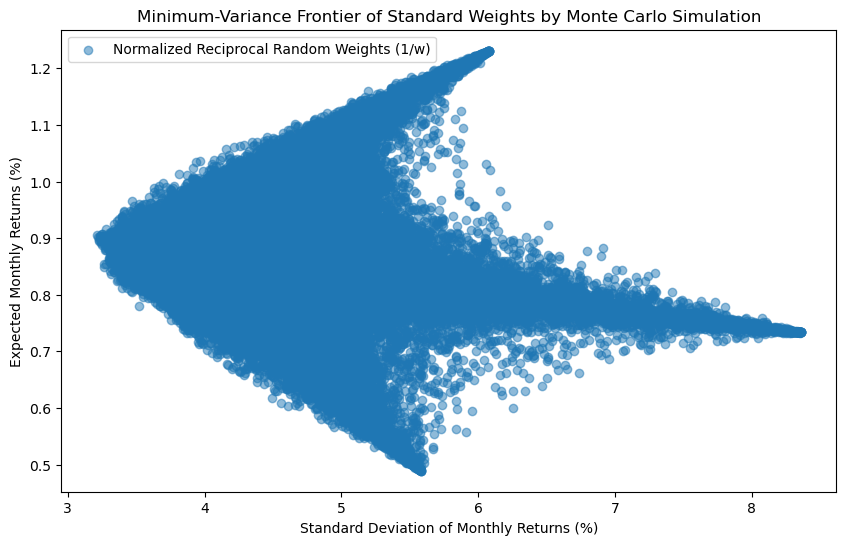

In [64]:
# Set simulation number
simulation = 150000
results = []

for i in range(simulation):
    # Generate random portfolio weights with size 10 x 1 with range 0 to 1
    weights = np.random.uniform(0,1,size=(10,1))
    # Use 1/w
    weights = 1/weights
    # Normalize weights
    weights = weights/np.sum(weights)
    

    #Calculate portfolio returns and standard deviation
    portfolio_returns = np.dot(weights.T, R).item()
    portfolio_var = np.dot(weights.T, np.dot(V,weights)).item()
    portfolio_std = np.sqrt(portfolio_var).item()

    results.append((portfolio_returns, portfolio_std))

results = np.array(results)
# Plot
plt.figure(figsize=(10,6))
plt.scatter(results[:,1], results[:, 0], marker = 'o', alpha=0.5, label="Normalized Reciprocal Random Weights (1/w)")
plt.title("Minimum-Variance Frontier of Standard Weights by Monte Carlo Simulation")
plt.xlabel("Standard Deviation of Monthly Returns (%)")
plt.ylabel("Expected Monthly Returns (%)")
plt.legend()
plt.show()